<a href="https://colab.research.google.com/github/JAMESCUDERO/Marathon/blob/main/mara%20practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MarathonData.csv to MarathonData.csv


In [3]:
df = pd.read_csv("MarathonData.csv")

In [5]:
df.head(3)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A


In [23]:
df.describe()

,km4week,sp4week,MarathonTime
count,81.000000,81.000000,81.000000
mean,62.650617,149.305494,3.306914
std,26.844590,1234.766228,0.380617
min,17.900000,8.031414,2.370000
25%,45.200000,11.566474,2.990000
50%,59.100000,12.163424,3.320000
75%,78.200000,12.878981,3.590000
max,137.500000,11125.000000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'MarathonTime'}>]], dtype=object)

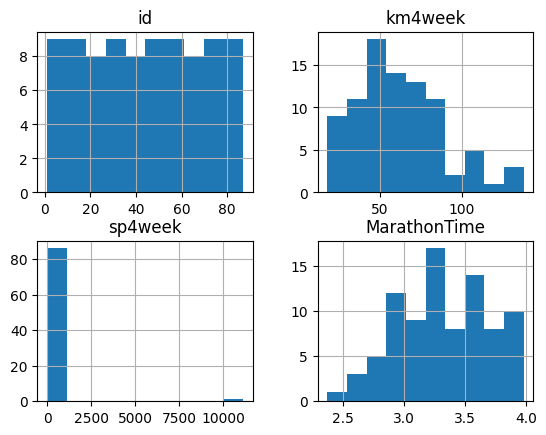

In [7]:
df. hist()

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [12]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['CATEGORY'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Marathon'])

In [14]:
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
dtype: int64

In [17]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)

In [24]:
df.isna().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

In [19]:
df['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 5h',
       'ciclista 3h'], dtype=object)

In [20]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [21]:
df = df.dropna(how='any')

In [22]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [28]:
M_Cross ={'CrossTraining': {'ciclista 1h':1, 'ciclista 3h':3, 'ciclista 4h':4, 'ciclista 5h': 5, 'ciclista 13h':13}}
df.replace(M_Cross, inplace=True)

<ipython-input-28-ee2961ae5577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(M_Cross, inplace=True)


In [29]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,3,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95
